In [36]:
import shlex, subprocess
import os
import gzip
import re
import scipy as sp
import numpy.random as rd
import matplotlib
import numpy as np
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from operator import itemgetter
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches

In [2]:
os.chdir('/mnt/ryan/confidence_estimate_experiment')

In [3]:
def prob_to_logodds(myprob):
    return sp.log(myprob/(1-myprob))

In [5]:
def parsing(inp):    
    DATAFILE_PATTERN = '^(.+) (.+)'
    match = re.search(DATAFILE_PATTERN, inp)
    return (float(match.group(1)), float(match.group(2)))

In [4]:
#predictions from the "ground truth" model
pred1 = []
with open("pred_original.out", "r") as f:
      for line in f:
        pred1.append(prob_to_logodds(float(line)))

In [6]:
#predictions and uncertainty scores from the ftrl model and --ftrl_confidence option
pred_with_ce = []
with open("pred_with_ce_original.out", "r") as f:
      for line in f:
        pred_with_ce.append(parsing(line))

In [14]:
np_errors = np.array(errors)
ce = map(lambda x: x[1][1]  ,zip(pred1, pred_with_ce))
np_ce = np.array(ce)
from scipy.stats import rankdata
np_ce = rankdata(np_ce) / len(np_ce)

In [15]:
errors = map(lambda x: sp.absolute(x[1][0]-x[0]),zip(pred1, pred_with_ce))

In [22]:
errors_ce = sorted(zip(np_errors, np_ce), key=itemgetter(1))
errors_ce_errors= map(lambda x: x[0], errors_ce)
cuts = 1000
myrange = np.array(range(0,cuts + 1))/float(cuts)*len(errors_ce_errors)
#calculate 25, 50, and 75 percentiles
q25 = []
q50= []
q75= []
for i in range(0,cuts):
    filt_dat = errors_ce_errors[int(myrange[i]):int(myrange[i+1])]
    q25.append(np.percentile(filt_dat, 25))
    q50.append(np.percentile(filt_dat, 50))
    q75.append(np.percentile(filt_dat, 75))

In [29]:
myxrange = np.array(range(0,cuts))/float(cuts)

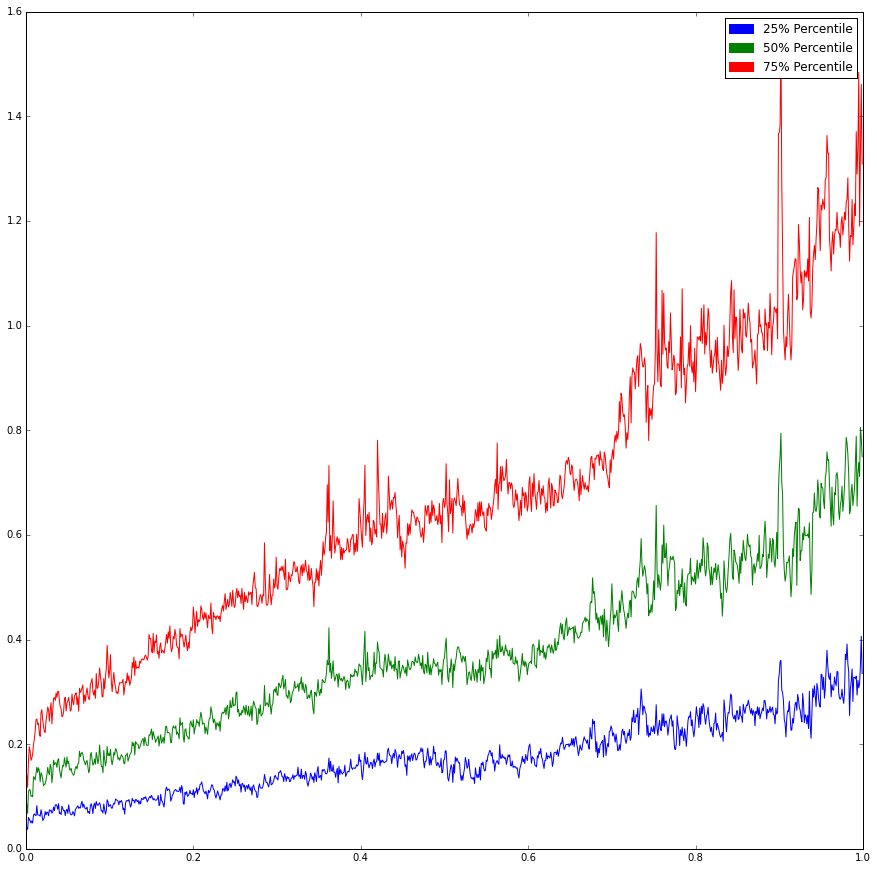

In [40]:
myxrange = np.array(range(0,cuts))/float(cuts)
red_patch = mpatches.Patch(color='red', label='75% Percentile')
blue_patch = mpatches.Patch(color='blue', label='25% Percentile')
green_patch = mpatches.Patch(color='green', label='50% Percentile')


plt.figure(figsize=(15,15))
plt.plot(myxrange, q25)
plt.plot(myxrange, np.array(q50))
plt.plot(myxrange, np.array(q75))
plt.legend(handles=[blue_patch, green_patch, red_patch])
plt.show()

<matplotlib.colorbar.Colorbar instance at 0x7f945636bd40>

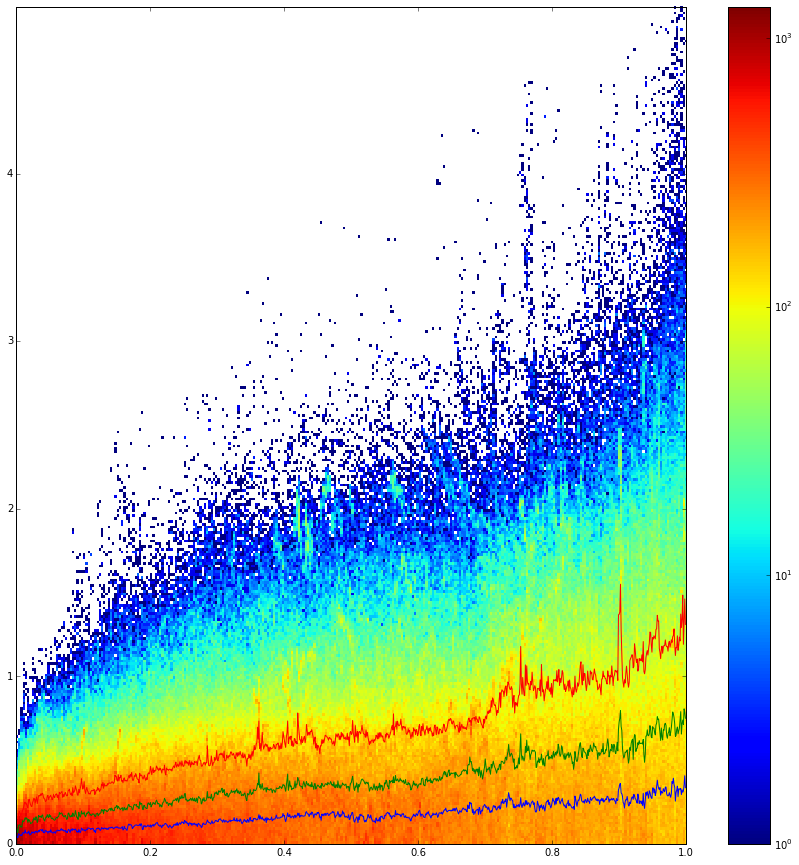

In [41]:
%matplotlib inline 
plt.figure(figsize=(15,15))
filter_expr = (np_errors < 5) & (np_ce < 2)
plt.hist2d( np_ce[filter_expr],  np_errors[filter_expr], bins=300, norm=LogNorm())
plt.plot(myxrange, q25, 'blue')
plt.plot(myxrange, q50, 'green')
plt.plot(myxrange, q75, 'red')
plt.colorbar()